In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from source import Vermont_Farm
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
VF = Vermont_Farm()

# TFP as dependent variable

In [4]:
df_diversity = pd.read_csv('./1860Midd_final.csv')
df_diversity = df_diversity.drop(['Name', 'town', 'unimproved', 'cash_val', 'produce_val', 'pg_num', 'year', 'rown'], axis=1)
df_diversity.head(1)

,improved,machine_val,horse,mules,milkcow,oxen,cattle,sheep,swine,livestock_val,...,flax,flaxseed,silk,maplesugar,canesugar,molasses,beewax,honey,manufactures_val,animals_val
0,38,50,2,0,1,0,4,0,0,210,...,0,0,0,0,0,0,0,0,15,28


In [5]:
df_diversity = df_diversity.to_numpy()
print(df_diversity.shape)
df_diversity = 1 * (df_diversity > 0)
print(df_diversity.shape)

(159, 44)
(159, 44)


In [6]:
df3 = pd.read_csv('./1860final_w_TotalOutput.csv')
div_score = np.sum(df_diversity, axis=1)
print(div_score.shape)
df3['diversity_score'] = div_score
df3.to_csv("1860diversity_score.csv")

(159,)


In [7]:
entropy_score = df3["entropy_score"].to_numpy()
df3['diversity_squared'] = np.square(div_score)
df3['e_to_diversity'] = np.exp(div_score)
df3['entropy_squared'] = np.square(entropy_score)

# generated diversity score

In [8]:
cols2 = ['improved', 'unimproved', 
       'machine_val', 'horse', 'mules']
# Fit regression model (using the natural log of one of the regressors)
# results = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=dat).fit()
reg1 = smf.ols("TFP ~ diversity_score", data=df3).fit()
# print(reg1.summary())

In [9]:
reg2 = smf.ols("TFP ~ diversity_score + improved + unimproved", data=df3).fit()

In [10]:
reg3 = smf.ols("TFP ~ diversity_score + diversity_squared + improved + unimproved", data=df3).fit()
reg4 = smf.ols("TFP ~ entropy_score + improved + unimproved", data=df3).fit()
reg5 = smf.ols("TFP ~ entropy_score + entropy_squared + improved + unimproved", data=df3).fit()
reg6 = smf.ols("TFP ~ entropy_score + machine_val + cash_val", data=df3).fit()
reg7 = smf.ols("TFP ~ entropy_score + machine_val + cash_val + livestock_val + animals_val", data=df3).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                    TFP   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.420
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0508
Time:                        15:08:07   Log-Likelihood:                -1156.3
No. Observations:                 159   AIC:                             2323.
Df Residuals:                     154   BIC:                             2338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -552.4191    996.32

In [11]:
stargazer = Stargazer([reg1, reg2, reg4, reg5, reg6, reg7])

In [12]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{6}{c}{\textit{Dependent variable:}} \
\cr \cline{6-7}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) \\
\hline \\[-1.8ex]
 Intercept & -534.273$^{***}$ & -551.637$^{***}$ & 634.157$^{***}$ & 3155.493$^{***}$ & 635.564$^{***}$ & 606.032$^{***}$ \\
  & (191.672) & (197.756) & (220.369) & (592.690) & (220.670) & (195.331) \\
 animals_val & & & & & & 1.181$^{}$ \\
  & & & & & & (0.779) \\
 cash_val & & & & & -0.001$^{}$ & -0.051$^{***}$ \\
  & & & & & (0.016) & (0.016) \\
 diversity_score & 35.779$^{***}$ & 37.800$^{***}$ & & & & \\
  & (11.646) & (12.940) & & & & \\
 entropy_score & & & -367.125$^{***}$ & -3913.997$^{***}$ & -372.261$^{***}$ & -371.372$^{***}$ \\
  & & & (125.808) & (789.879) & (126.286) & (113.029) \\
 entropy_squared & & & & 1191.024$^{***}$ & & \\
  & & & & (262.235) & & \\
 improved & & -0.022$^{}$ & 0.404$^{}$ & 0.580$^{}$ & & \\
  & & (0.503

# taking logs

In [13]:
df3["log_diversity_score"] = np.log(df3['diversity_score'].to_numpy())
df3["log_entropy_score"] = np.log(df3['entropy_score'].to_numpy())
df3["log_rev_per_land"] = np.log(df3['revenue_per_land'].to_numpy())

<AxesSubplot:xlabel='log_entropy_score', ylabel='revenue_per_land'>

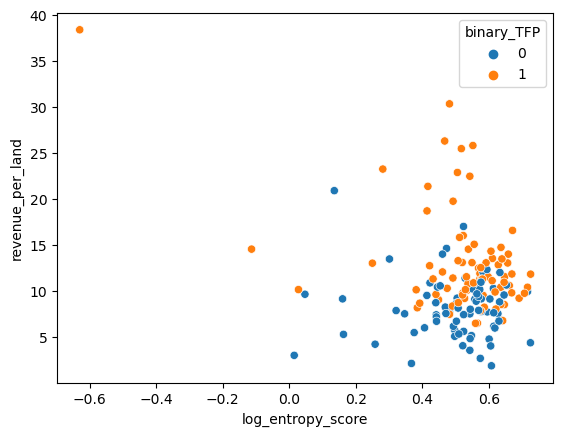

In [16]:
sns.scatterplot(data=df3, x='log_entropy_score', y='revenue_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='log_diversity_score', ylabel='revenue_per_land'>

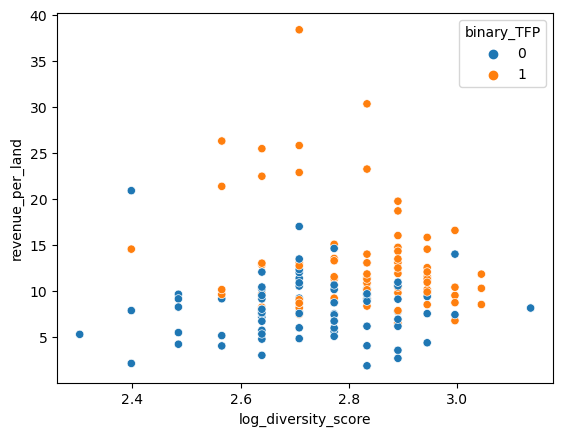

In [18]:
sns.scatterplot(data=df3, x='log_diversity_score', y='revenue_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='diversity_score', ylabel='revenue_per_land'>

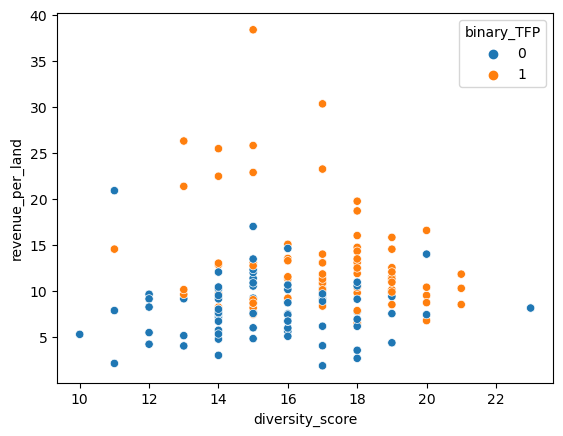

In [19]:
sns.scatterplot(data=df3, x='diversity_score', y='revenue_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='entropy_score', ylabel='log_rev_per_land'>

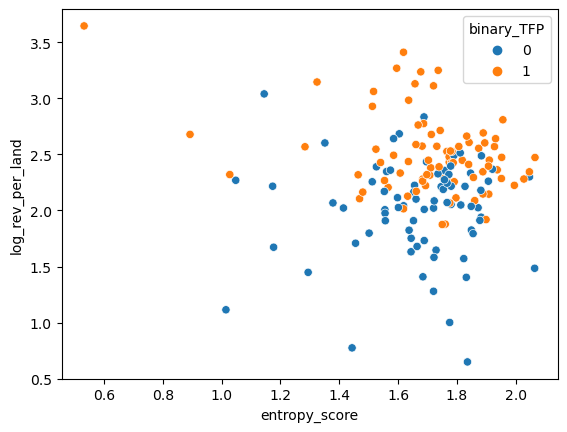

In [22]:
sns.scatterplot(data=df3, x='entropy_score', y='log_rev_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='diversity_score', ylabel='log_rev_per_land'>

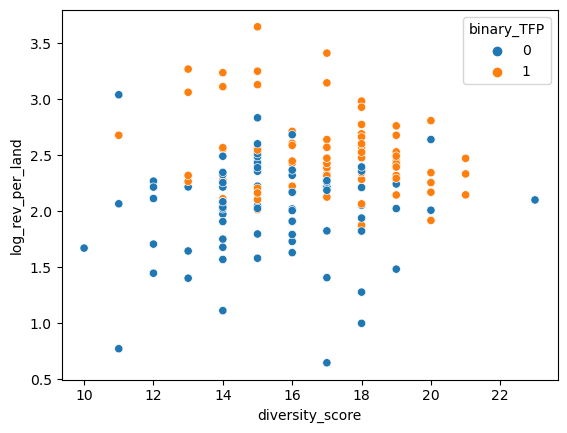

In [23]:
sns.scatterplot(data=df3, x='diversity_score', y='log_rev_per_land', hue='binary_TFP')

<AxesSubplot:xlabel='diversity_score', ylabel='TFP'>

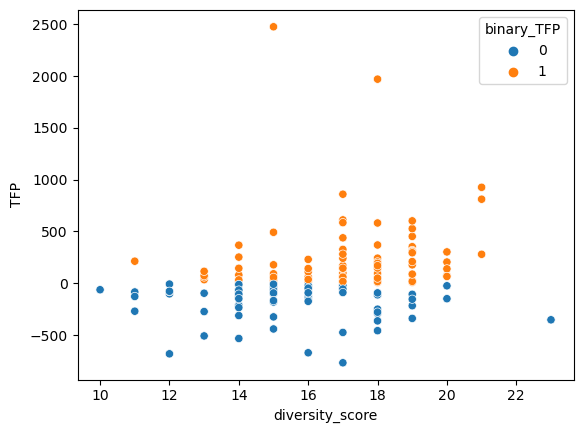

In [20]:
sns.scatterplot(data=df3, x='diversity_score', y='TFP', hue='binary_TFP')

<AxesSubplot:xlabel='log_entropy_score', ylabel='TFP'>

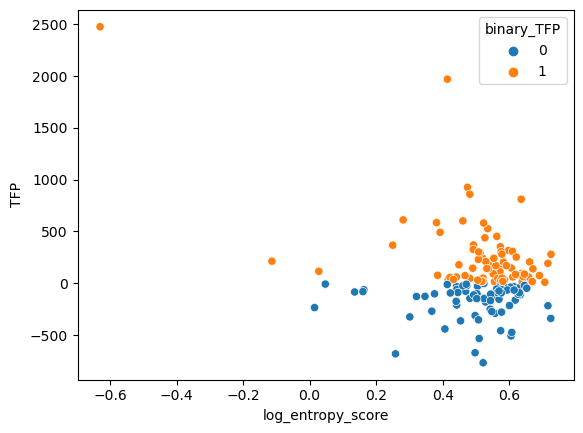

In [24]:
sns.scatterplot(data=df3, x='log_entropy_score', y='TFP', hue='binary_TFP')

<AxesSubplot:xlabel='entropy_score', ylabel='TFP'>

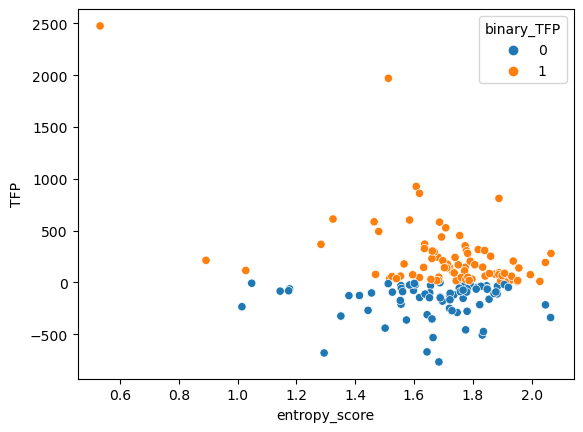

In [25]:
sns.scatterplot(data=df3, x='entropy_score', y='TFP', hue='binary_TFP')